#**Load Data**

In [9]:
# library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://www.openml.org/data/get_csv/31/dataset_31_german_credit.arff"

df = pd.read_csv(url)

print(df.head())

  checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'      '>=7'   
1             radio/tv           5951              '<100'   '1<=X<4'   
2            education           2096              '<100'   '4<=X<7'   
3  furniture/equipment           7882              '<100'   '4<=X<7'   
4            'new car'           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       2  'female d

In [10]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


##Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [3]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<Axes: xlabel='class'>

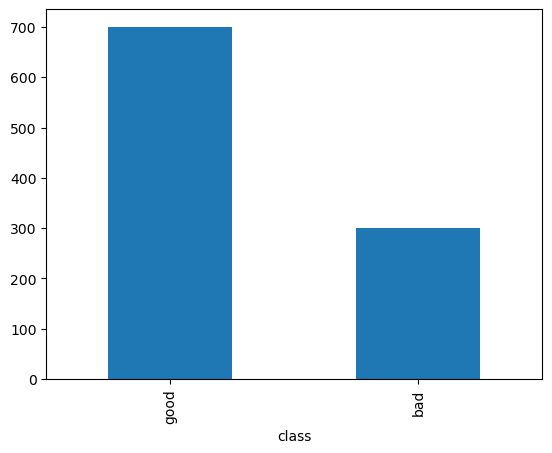

In [4]:
df["class"].value_counts().plot(kind="bar")

## Data Splitting

In [5]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
29,'<0',60,'delayed previously',business,6836,'<100','>=7',3,'male single',none,4,'no known property',63,none,own,2,skilled,1,yes,yes
535,'>=200',21,'critical/other existing credit',education,2319,'<100','<1',2,'male div/sep',none,1,car,33,none,rent,1,skilled,1,none,yes
695,'no checking',6,'existing paid','used car',1236,'500<=X<1000','1<=X<4',2,'male single',none,4,'life insurance',50,none,rent,1,skilled,1,none,yes
557,'no checking',21,'no credits/all paid','new car',5003,'no known savings','1<=X<4',1,'female div/dep/mar',none,4,'life insurance',29,bank,own,2,skilled,1,yes,yes
836,'no checking',12,'existing paid',radio/tv,886,'no known savings','1<=X<4',4,'female div/dep/mar',none,2,car,21,none,own,1,skilled,1,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,'no checking',18,'all paid','new car',6458,'<100','>=7',2,'male single',none,4,'no known property',39,bank,own,2,'high qualif/self emp/mgmt',2,yes,yes
270,'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
860,'no checking',24,'critical/other existing credit','used car',5804,'>=1000','1<=X<4',4,'male single',none,2,'real estate',27,none,own,2,skilled,1,none,yes
435,'0<=X<200',12,'existing paid',radio/tv,1484,'no known savings','1<=X<4',2,'male mar/wid',none,1,'real estate',25,none,own,1,skilled,1,yes,yes


In [7]:
X_test

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,'<0',18,'existing paid',radio/tv,3190,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',24,none,own,1,skilled,1,none,yes
737,'<0',18,'existing paid','new car',4380,'100<=X<500','1<=X<4',3,'male single',none,4,car,35,none,own,1,'unskilled resident',2,yes,yes
740,'<0',24,'all paid','new car',2325,'100<=X<500','4<=X<7',2,'male single',none,3,car,32,bank,own,1,skilled,1,none,yes
660,'>=200',12,'existing paid',radio/tv,1297,'<100','1<=X<4',3,'male mar/wid',none,4,'real estate',23,none,rent,1,skilled,1,none,yes
411,'no checking',33,'critical/other existing credit','used car',7253,'<100','4<=X<7',3,'male single',none,2,car,35,none,own,2,'high qualif/self emp/mgmt',1,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,'no checking',24,'existing paid',radio/tv,3235,'500<=X<1000','>=7',3,'male div/sep',none,2,car,26,none,own,1,'high qualif/self emp/mgmt',1,yes,yes
332,'0<=X<200',60,'existing paid','new car',7408,'100<=X<500','<1',4,'female div/dep/mar',none,2,'life insurance',24,none,own,1,'high qualif/self emp/mgmt',1,none,yes
208,'<0',24,'existing paid',business,6568,'<100','1<=X<4',2,'male mar/wid',none,2,car,21,stores,own,1,'unskilled resident',1,none,yes
613,'<0',24,'all paid','used car',3632,'<100','1<=X<4',1,'female div/dep/mar',guarantor,4,car,22,bank,rent,1,skilled,1,none,no


##Model Building

Training the model

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: "'<0'"

evaluasi model

[[ 25  34]
 [  8 133]]
              precision    recall  f1-score   support

         bad       0.76      0.42      0.54        59
        good       0.80      0.94      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



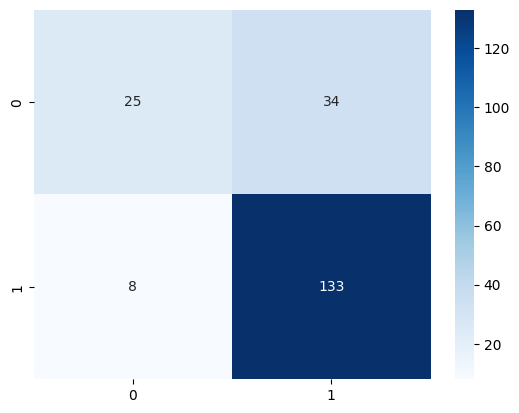

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

cost matrix

In [13]:
from sklearn.metrics import make_scorer, roc_auc_score


def custom_cost_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0, 1] + 5 * cm[1, 0]


scorer = make_scorer(custom_cost_matrix, greater_is_better=False)

optimasi model

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/fauzanghaza/Applications/miniconda3/envs/bismillah/lib/python3.10/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: "'<0'"


##Prediksi dan Interpretasi

Membuat Prediksi